In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('fast_food_consumption_health_impact_dataset.csv')
df.sample().transpose()

,156
Age,56
Gender,Male
Fast_Food_Meals_Per_Week,11
Average_Daily_Calories,3440
BMI,22.4
Physical_Activity_Hours_Per_Week,5.0
Sleep_Hours_Per_Day,5.7
Energy_Level_Score,4
Digestive_Issues,Yes
Doctor_Visits_Per_Year,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               800 non-null    int64  
 1   Gender                            800 non-null    object 
 2   Fast_Food_Meals_Per_Week          800 non-null    int64  
 3   Average_Daily_Calories            800 non-null    int64  
 4   BMI                               800 non-null    float64
 5   Physical_Activity_Hours_Per_Week  800 non-null    float64
 6   Sleep_Hours_Per_Day               800 non-null    float64
 7   Energy_Level_Score                800 non-null    int64  
 8   Digestive_Issues                  800 non-null    object 
 9   Doctor_Visits_Per_Year            800 non-null    int64  
 10  Overall_Health_Score              800 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 68.9+ KB


In [5]:
## Preprocesamiento de datos
target='Digestive_Issues'
X=df.drop(columns=[target])
y=df[target]

In [6]:
print(y.info())
print(X.info())

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: Digestive_Issues
Non-Null Count  Dtype 
--------------  ----- 
800 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               800 non-null    int64  
 1   Gender                            800 non-null    object 
 2   Fast_Food_Meals_Per_Week          800 non-null    int64  
 3   Average_Daily_Calories            800 non-null    int64  
 4   BMI                               800 non-null    float64
 5   Physical_Activity_Hours_Per_Week  800 non-null    float64
 6   Sleep_Hours_Per_Day               800 non-null    float64
 7   Energy_Level_Score                800 non-null    int64  
 8   Doctor_Visits_Per_Year            800 non-null

In [7]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=123, stratify=y)

In [8]:
num_cols=X.select_dtypes(include=['int64','float64']).columns
cat_cols=X.select_dtypes(include=['object']).columns

In [9]:
num_transformer=Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler',StandardScaler())])

cat_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])
 

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [11]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Fast_Food_Meals_Per_Week', 'Average_Daily_Calories', 'BMI',
       'Physical_Activity_Hours_Per_Week', 'Sleep_Hours_Per_Day',
       'Energy_Level_Score', 'Doctor_Visits_Per_Year', 'Overall_Health_Score'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [12]:
y_pred = pipeline.predict(X_test)
#y_test.shape
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN COMPLETO")
print("="*50)
print(classification_report(y_test, y_pred))


REPORTE DE CLASIFICACIÓN COMPLETO
              precision    recall  f1-score   support

          No       0.65      0.87      0.74       124
         Yes       0.52      0.22      0.31        76

    accuracy                           0.62       200
   macro avg       0.58      0.55      0.53       200
weighted avg       0.60      0.62      0.58       200



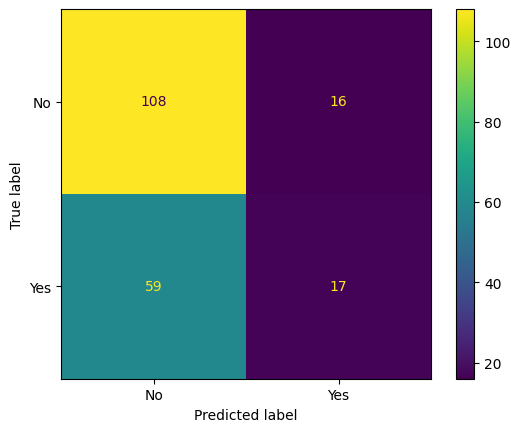

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
disp.plot()
#plt.figure(figsize=(150,200))
plt.show()

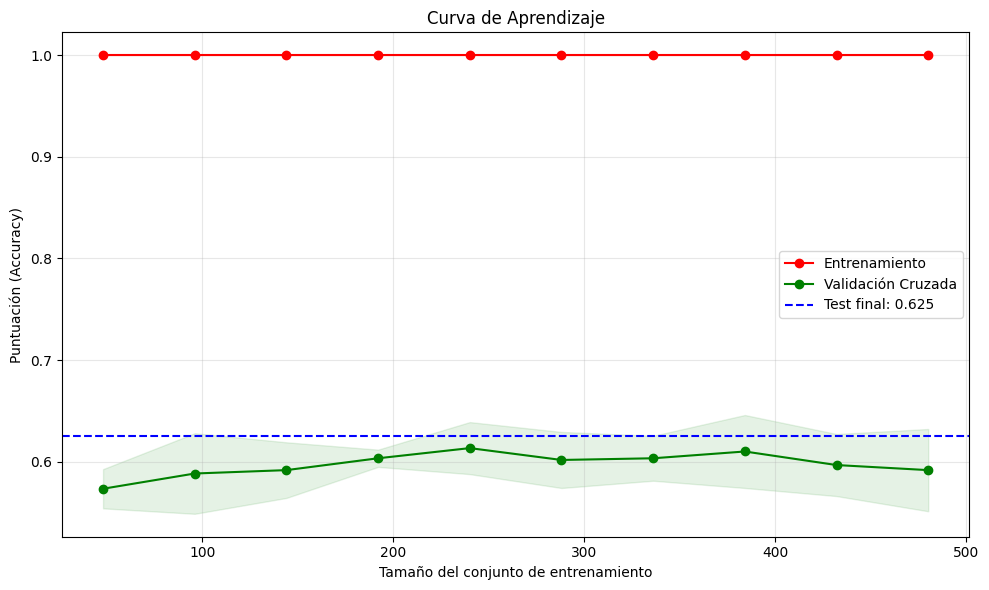


ANÁLISIS DE LA CURVA DE APRENDIZAJE
Tamaño total de entrenamiento: 600 muestras
Puntaje final en entrenamiento: 1.0000
Puntaje final en validación cruzada: 0.5917
Puntaje final en test: 0.6250
Diferencia entrenamiento-test: 0.3750

Análisis de brecha:
Sobreajuste significativo


In [14]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 1.0, 10)  # 10 puntos desde 10% a 100%

train_sizes_abs, train_scores, test_scores = learning_curve(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1, 
    random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)#media train scores
train_scores_std = np.std(train_scores, axis=1)#desviación estandar train scores
test_scores_mean = np.mean(test_scores, axis=1)#media test scores
test_scores_std = np.std(test_scores, axis=1)#desviación estandar test

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Puntuación (Accuracy)")

# Líneas principales
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Validación Cruzada")

# Áreas de sombra para las desviaciones estándar
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")

plt.legend(loc="best")
plt.grid(True, alpha=0.3)

test_final_score = pipeline.score(X_test, y_test)
plt.axhline(y=test_final_score, color='b', linestyle='--', 
            label=f'Test final: {test_final_score:.3f}')

plt.legend(loc="best")
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ANÁLISIS DE LA CURVA DE APRENDIZAJE")
print("="*50)
print(f"Tamaño total de entrenamiento: {len(X_train)} muestras")
print(f"Puntaje final en entrenamiento: {train_scores_mean[-1]:.4f}")
print(f"Puntaje final en validación cruzada: {test_scores_mean[-1]:.4f}")
print(f"Puntaje final en test: {test_final_score:.4f}")
print(f"Diferencia entrenamiento-test: {train_scores_mean[-1] - test_final_score:.4f}")

gap = train_scores_mean[-1] - test_scores_mean[-1]
print(f"\nAnálisis de brecha:")
if gap < 0.05:
    print("Buen equilibrio (poco sobreajuste)")
elif gap < 0.1:
    print("Sobreajuste moderado")
else:
    print("Sobreajuste significativo")

%%%%%%%%%%%%%%%%%%%%%%%% GRID SEARCH CV %%%%%%%%%%%%%%%%%%%%%%%%%

In [15]:

from sklearn.model_selection import train_test_split, GridSearchCV  #se añade GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# Partición en entrenamiento, validación y prueba#X.dtypes

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)

x_train, x_resto, y_train, y_resto = train_test_split(
    X, y, test_size=0.25, random_state=123
)

x_val, x_test, y_val, y_test = train_test_split(
    x_resto, y_resto, test_size=0.25, random_state=321)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline con preprocesamiento
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Grid de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_leaf': [1, 3]
}

#Envoltura del pipeline en GridSearchCV 
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar (usa x_train, no toca val/test)
grid.fit(x_train, y_train)

# Evaluar con el mejor modelo seleccionado
print("Mejores hiperparámetros:", grid.best_params_)
print("Accuracy en test:", grid.score(x_test, y_test))

#Generar predicciones con el mejor estimador
print("Predicciones:", grid.predict(x_test))

Columnas numéricas: ['Age', 'Fast_Food_Meals_Per_Week', 'Average_Daily_Calories', 'BMI', 'Physical_Activity_Hours_Per_Week', 'Sleep_Hours_Per_Day', 'Energy_Level_Score', 'Doctor_Visits_Per_Year', 'Overall_Health_Score']
Columnas categóricas: ['Gender']
Mejores hiperparámetros: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 3, 'classifier__n_estimators': 100}
Accuracy en test: 0.62
Predicciones: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [16]:
best_model = grid.best_estimator_

val_accuracy = best_model.score(x_val, y_val)
print(f"Accuracy en Validation: {val_accuracy:.4f}")

test_accuracy = best_model.score(x_test, y_test)
print(f"Accuracy en Test: {test_accuracy:.4f}")

# Comparar con el baseline
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
baseline_accuracy = dummy.score(x_test, y_test)
print(f"Accuracy Baseline (clase mayoritaria): {baseline_accuracy:.4f}")

Accuracy en Validation: 0.6400
Accuracy en Test: 0.6200
Accuracy Baseline (clase mayoritaria): 0.6200


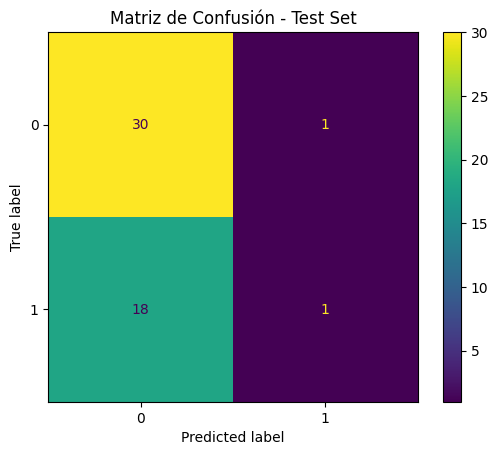


REPORTE DE CLASIFICACIÓN COMPLETO
              precision    recall  f1-score   support

          No       0.62      0.97      0.76        31
         Yes       0.50      0.05      0.10        19

    accuracy                           0.62        50
   macro avg       0.56      0.51      0.43        50
weighted avg       0.58      0.62      0.51        50



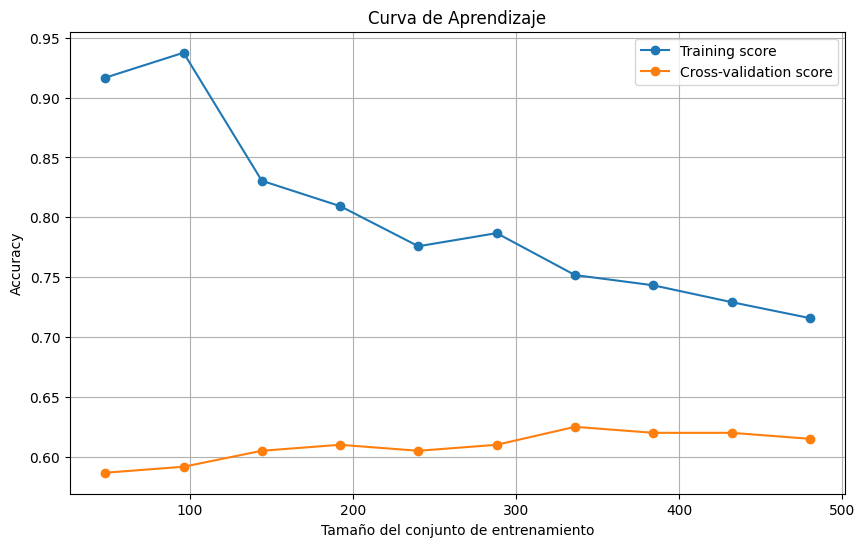

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

y_pred = best_model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión - Test Set")
plt.show()

# Reporte de clasificación completo
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN COMPLETO")
print("="*50)
print(classification_report(y_test, y_pred))
# Curva de aprendizaje 
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    best_model, x_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()




Top 10 características más importantes:
                            feature  importance
2            Average_Daily_Calories    0.173880
4  Physical_Activity_Hours_Per_Week    0.168592
3                               BMI    0.118457
0                               Age    0.100360
5               Sleep_Hours_Per_Day    0.095952
1          Fast_Food_Meals_Per_Week    0.078218
6                Energy_Level_Score    0.076956
7            Doctor_Visits_Per_Year    0.076750
8              Overall_Health_Score    0.056840
9                     Gender_Female    0.026909


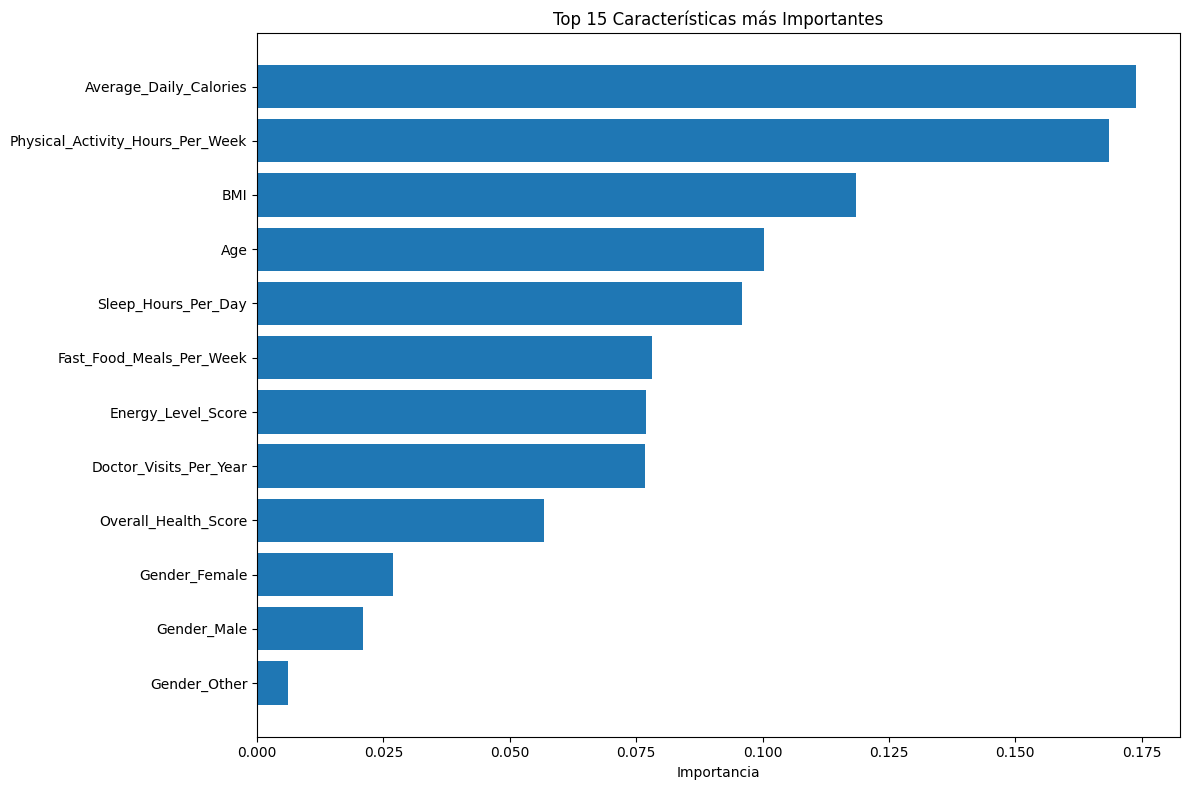

In [18]:
# Importancia de features 
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Obtener nombres de features después del preprocesamiento
    feature_names = []
    
    # Para variables numéricas
    if 'num' in best_model.named_steps['preprocessor'].named_transformers_:
        feature_names.extend(numeric_features)
    
    # Para variables categóricas (OneHotEncoder)
    if 'cat' in best_model.named_steps['preprocessor'].named_transformers_:
        ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = ohe.get_feature_names_out(categorical_features)
        feature_names.extend(cat_features)
#obtener importancias

    importances = best_model.named_steps['classifier'].feature_importances_
    
    # Crear DataFrame con importancias
    feat_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 características más importantes:")
    print(feat_imp_df.head(10))

    # Gráfico de importancias
    plt.figure(figsize=(12, 8))
    plt.barh(feat_imp_df['feature'][:15], feat_imp_df['importance'][:15])
    plt.title('Top 15 Características más Importantes')
    plt.xlabel('Importancia')    
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


In [19]:
print("="*60)
print("REPORTE FINAL DEL MODELO")
print("="*60)
print(f"Mejores hiperparámetros: {grid.best_params_}")
print(f"Mejor score en CV: {grid.best_score_:.4f}")
print(f"Accuracy en Validation: {val_accuracy:.4f}")
print(f"Accuracy en Test: {test_accuracy:.4f}")
print(f"Mejora sobre baseline: {test_accuracy - baseline_accuracy:.4f}")
#verificar overfitting
train_accuracy = best_model.score(x_train, y_train)
print(f"Accuracy en Train: {train_accuracy:.4f}")
print(f"Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

if (train_accuracy - test_accuracy) > 0.1:
    print("POSIBLE OVERFITTING: Diferencia grande entre train y test")
else:
    print("Buen balance: diferencia aceptable entre train y test")

REPORTE FINAL DEL MODELO
Mejores hiperparámetros: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 3, 'classifier__n_estimators': 100}
Mejor score en CV: 0.6150
Accuracy en Validation: 0.6400
Accuracy en Test: 0.6200
Mejora sobre baseline: 0.0000
Accuracy en Train: 0.6850
Diferencia Train-Test: 0.0650
Buen balance: diferencia aceptable entre train y test


%%%%%%%%%%%%%%%% COMPARACIÓN DE MODELOS ML %%%%%%%%%%%%%%%%%%%%


Train: 640 | Test: 160
Class distribution in test: No=99, Yes=61

Training Logistic Regression...
Logistic Regression - Acc: 0.600, Prec: 0.286, Rec: 0.033, F1: 0.059

Training Decision Tree...
Decision Tree - Acc: 0.588, Prec: 0.424, Rec: 0.230, F1: 0.298

Training Random Forest...
Random Forest - Acc: 0.600, Prec: 0.421, Rec: 0.131, F1: 0.200

Training Gradient Boosting...
Gradient Boosting - Acc: 0.619, Prec: 0.500, Rec: 0.246, F1: 0.330

Training SVM...
SVM - Acc: 0.631, Prec: 0.625, Rec: 0.082, F1: 0.145

Training K-Nearest Neighbors...
K-Nearest Neighbors - Acc: 0.594, Prec: 0.457, Rec: 0.344, F1: 0.393

Training MLP (Neural Net)...
MLP (Neural Net) - Acc: 0.550, Prec: 0.396, Rec: 0.344, F1: 0.368

Comparación de rendimiento de modelos Bar Plot



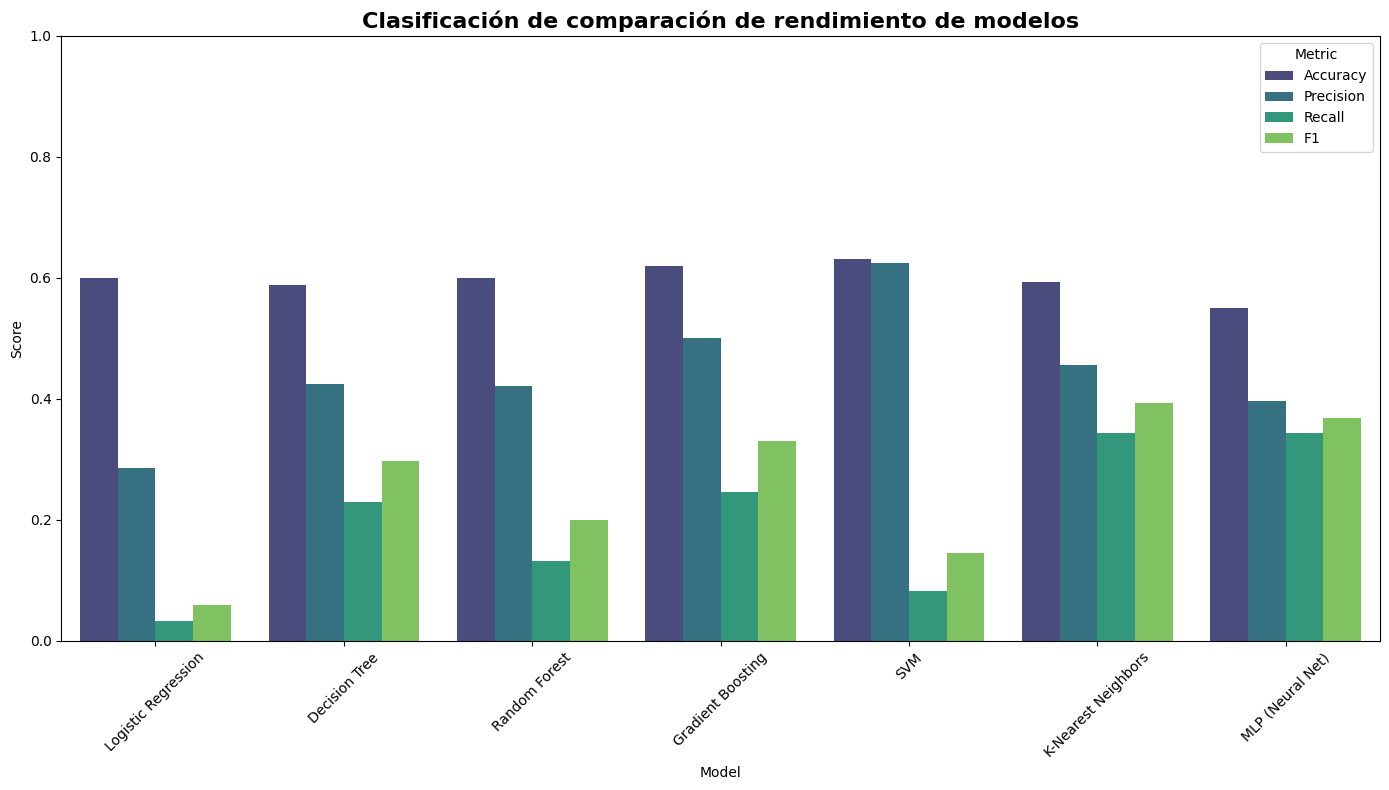

Matrices de confusión 



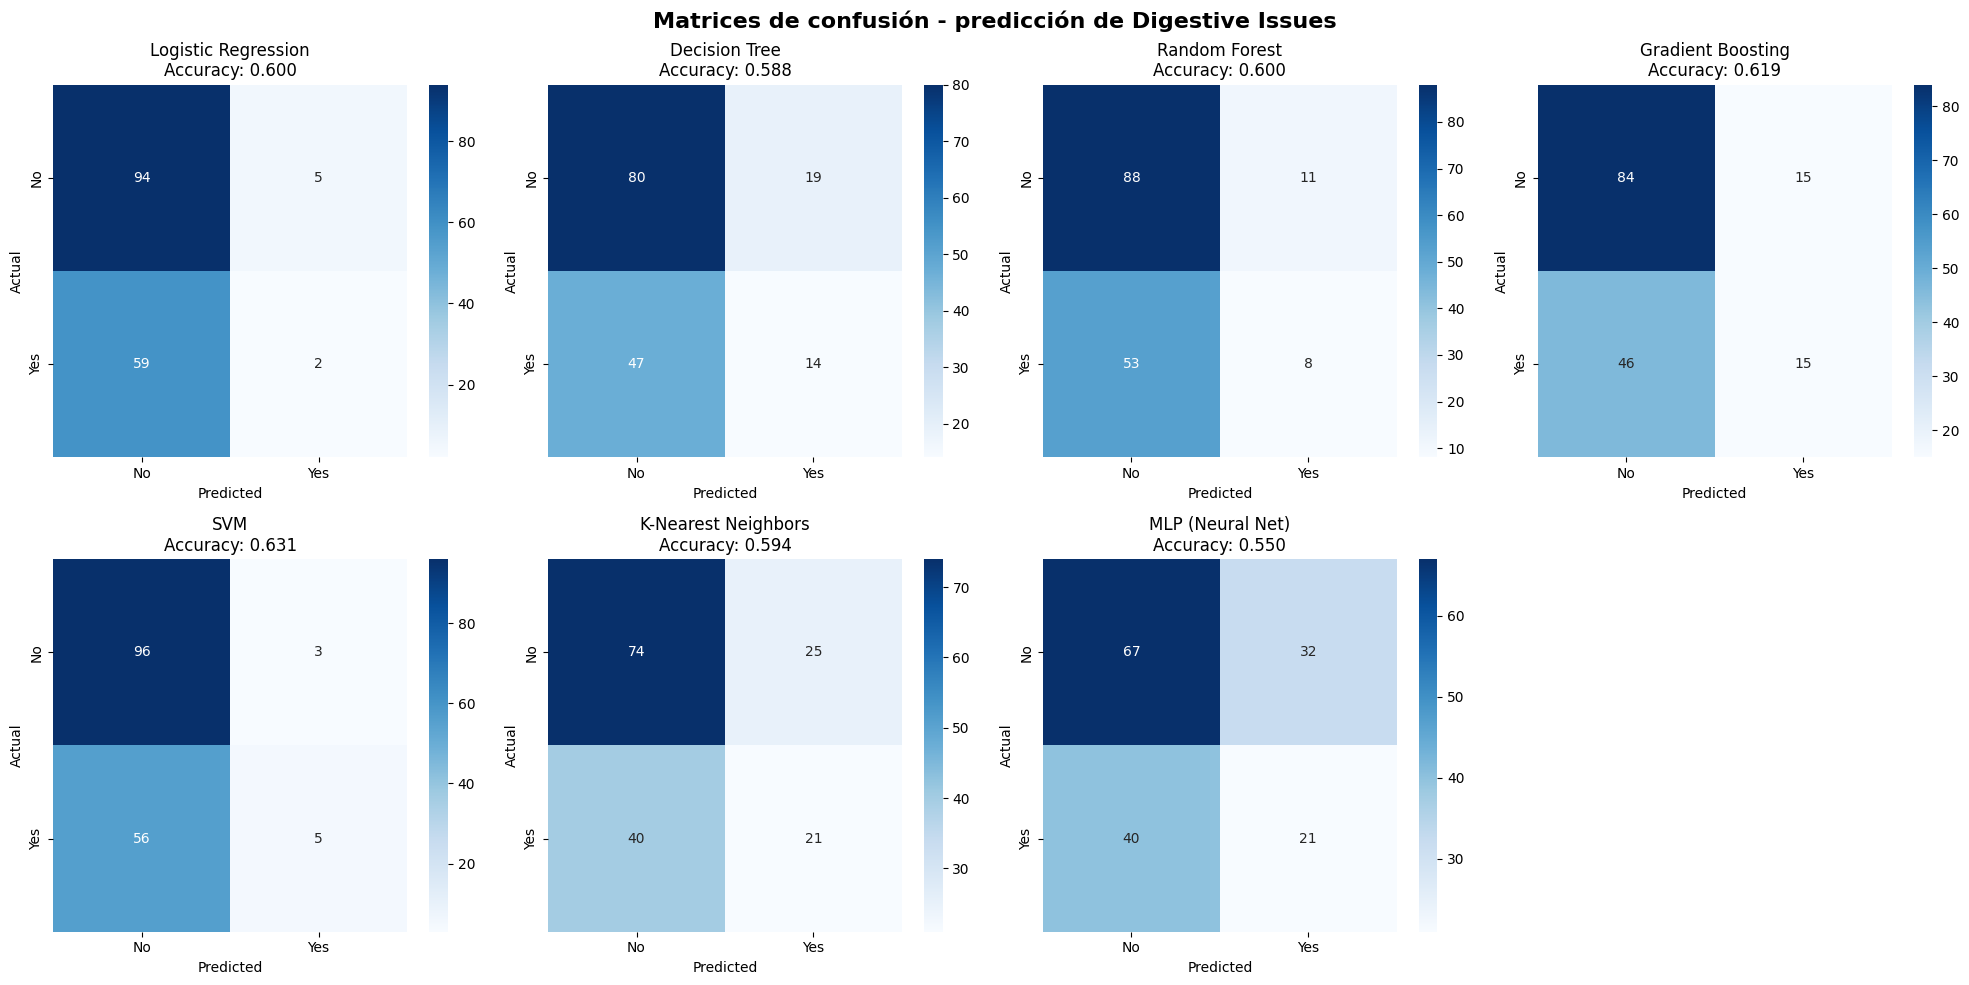

Detailed Report for Best Model (K-Nearest Neighbors)

              precision    recall  f1-score   support

   No Issues       0.65      0.75      0.69        99
  Has Issues       0.46      0.34      0.39        61

    accuracy                           0.59       160
   macro avg       0.55      0.55      0.54       160
weighted avg       0.58      0.59      0.58       160


 Learning Curve for Best Model: K-Nearest Neighbors



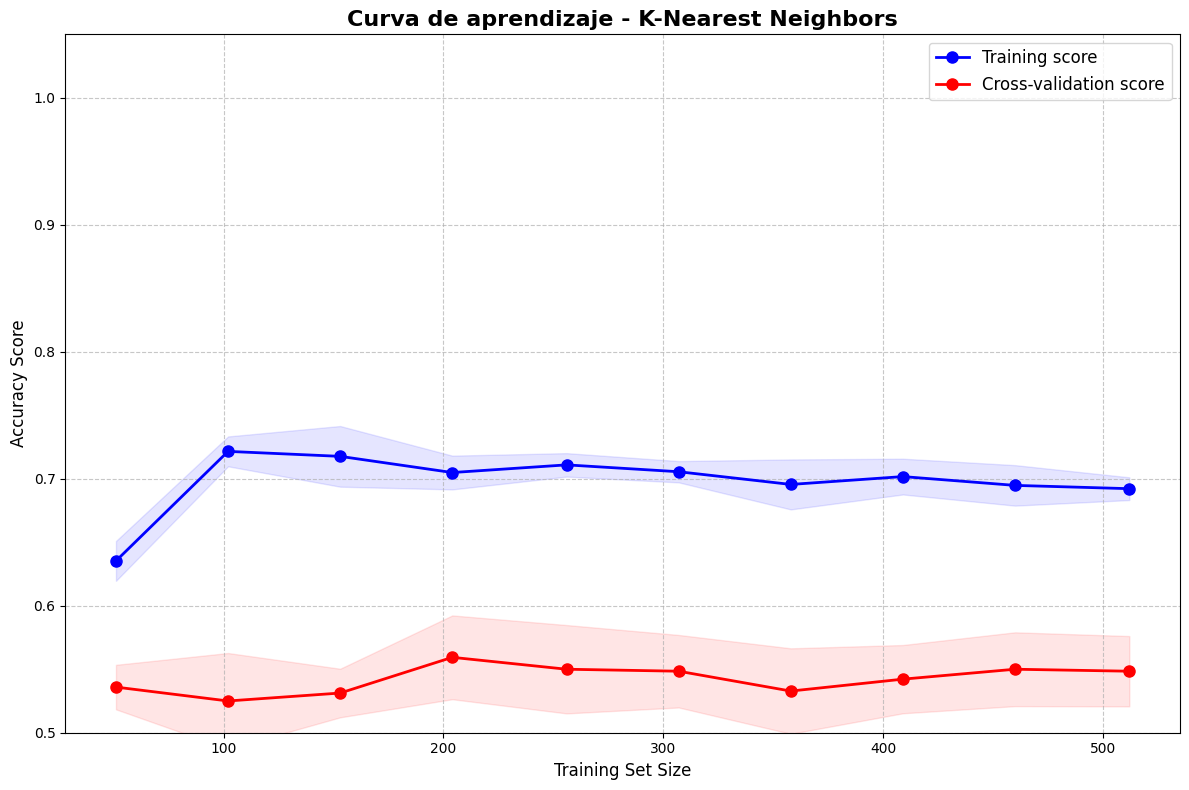

Análisis de curva de aprendizaje :
----------------------------------------
Final Training Score: 0.692
Final CV Score: 0.548
Gap (Train - CV): 0.144
Diferencia grande sigiere overfitting.
CV score bajo: Considerar recolectar mas datos.
Importancia de características para modelos Tree-Based



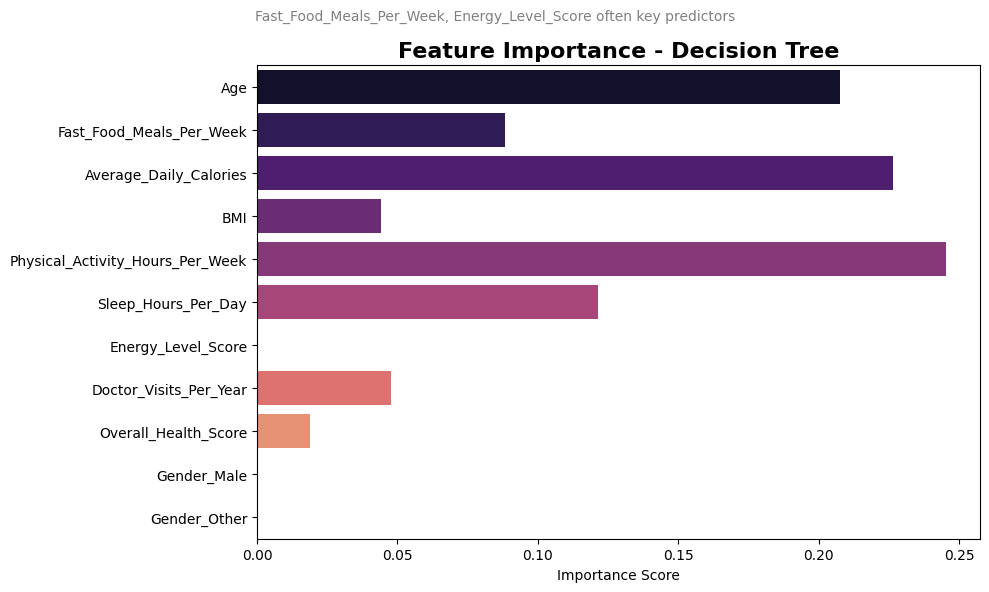

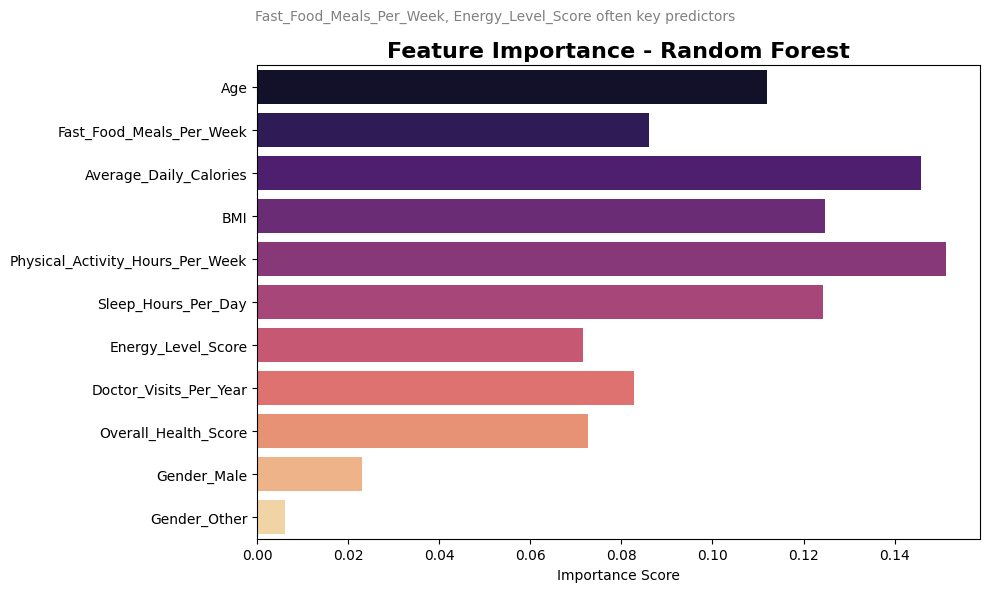

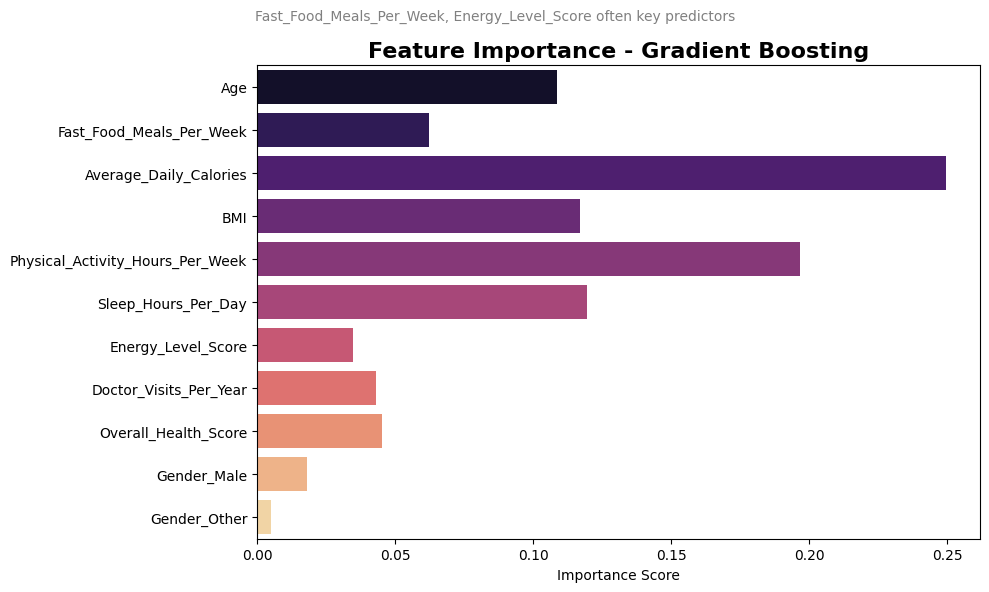

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Target and features
target = 'Digestive_Issues'
X = df.drop(columns=[target])
y = df[target].map({'No': 0, 'Yes': 1})  # Binary encoding

# Categorical and numerical columns
categorical_cols = ['Gender']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")
print(f"Class distribution in test: No={sum(y_test==0)}, Yes={sum(y_test==1)}\n")

# List of classification models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Train and evaluate
results = {}
predictions = {}
conf_matrices = {}
pipelines = {}

 
for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1}
    predictions[name] = y_pred
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    pipelines[name] = pipeline  # Almacenar el pipeline entrenado
    
    print(f"{name} - Acc: {acc:.3f}, Prec: {prec:.3f}, Rec: {rec:.3f}, F1: {f1:.3f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
results_df.columns = ['Model', 'Metric', 'Value']

print("Comparación de rendimiento de modelos Bar Plot\n")

plt.figure(figsize=(14, 8))
sns.barplot(data=results_df, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Clasificación de comparación de rendimiento de modelos', fontsize=16, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
#plt.suptitle('Higher = better | Tree ensembles (RF/GB) often excel on lifestyle data',
#             fontsize=10, color='gray')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

print("Matrices de confusión \n")
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()
for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {results[name]["Accuracy"]:.3f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xticklabels(['No', 'Yes'])
    axes[idx].set_yticklabels(['No', 'Yes'])
fig.delaxes(axes[-1])  # Remove empty subplot
plt.suptitle('Matrices de confusión - predicción de Digestive Issues', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

best_model_name = max(results, key=lambda x: results[x]['F1'])
best_pipeline = pipelines[best_model_name]  # Obtener el mejor pipeline
print(f"Detailed Report for Best Model ({best_model_name})\n")
print(classification_report(y_test, predictions[best_model_name], target_names=['No Issues', 'Has Issues']))


print(f"\n Learning Curve for Best Model: {best_model_name}\n")

# Usar learning_curve con el pipeline completo (incluye preprocesamiento)
train_sizes, train_scores, test_scores = learning_curve(
    best_pipeline, X_train, y_train, 
    cv=5, 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 puntos más suaves
    scoring='accuracy',
    random_state=42
)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', 
         linewidth=2, markersize=8, label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='red', 
         linewidth=2, markersize=8, label="Cross-validation score")
plt.fill_between(train_sizes, 
                 np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes, 
                 np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1),
                 alpha=0.1, color='red')
plt.title(f'Curva de aprendizaje - {best_model_name}', fontsize=16, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim([0.5, 1.05])  # Ajustar según tus datos
plt.tight_layout()
plt.show()

# Análisis adicional de la curva de aprendizaje
print("Análisis de curva de aprendizaje :")
print("-" * 40)
final_train_score = np.mean(train_scores[-1])
final_cv_score = np.mean(test_scores[-1])
gap = final_train_score - final_cv_score

print(f"Final Training Score: {final_train_score:.3f}")
print(f"Final CV Score: {final_cv_score:.3f}")
print(f"Gap (Train - CV): {gap:.3f}")

if gap > 0.1:
    print("Diferencia grande sigiere overfitting.")
elif gap < 0.05:
    print("Diferencia pequeña sugiere buena generalización.")
else:
    print("Diferencia moderada: El modelo aprende bien.")

if final_cv_score < 0.7:
    print("CV score bajo: Considerar recolectar mas datos.")
elif np.mean(test_scores[-1]) - np.mean(test_scores[0]) < 0.1:
    print("Sugerencia: Curva se aplana rápido. Pueden considerarse características mas complejas.")
else:
    print("Sugerencia: El model mejora con más datos.")

# -----------------------------
# Feature Importance (Tree-based Models)
# -----------------------------
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

print("Importancia de características para modelos Tree-Based\n")
for name in tree_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', models[name])])
    pipeline.fit(X_train, y_train)
    
    # Feature names after preprocessing
    ohe_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_features = numerical_cols + list(ohe_features)
    
    importances = pipeline.named_steps['model'].feature_importances_

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=all_features, palette='magma')
    plt.title(f'Feature Importance - {name}', fontsize=16, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.suptitle('Fast_Food_Meals_Per_Week, Energy_Level_Score often key predictors',
                 fontsize=10, color='gray')
    plt.tight_layout()
    plt.show()

